In [14]:
import napari
import numpy as np
from numpy.lib.format import open_memmap
import myfunctions as mf
import os
import matplotlib.pyplot as plt
from skimage.io import imshow
from skimage.measure import regionprops, label
import seaborn as sns
import pandas as pd

In [4]:
OS = 'Windows'
exp = mf.exp_list()[1]

hypervolume = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume.npy'), mode='r')
hypervolume_mask = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume_mask.npy'), mode='r')
print(hypervolume_mask.shape)
print(hypervolume.shape)

(61, 270, 500, 500)
(61, 270, 500, 500)


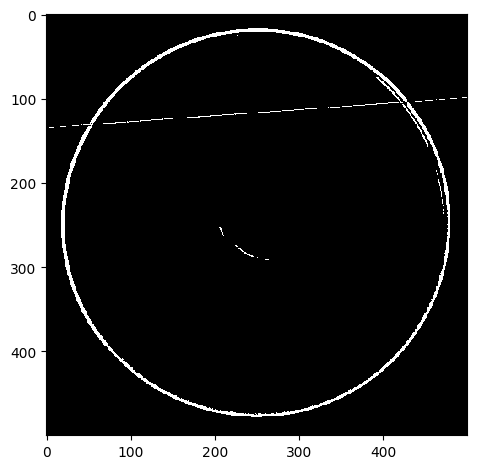

In [12]:
imshow(hypervolume[0, 3]>2)


Finding threshold...
Threshold=2.00 found in 0.10 s



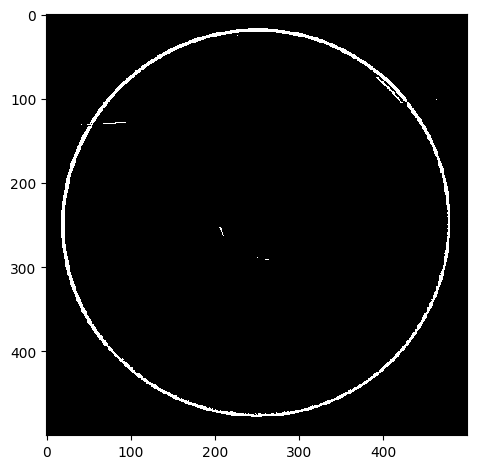

In [39]:
threshold = mf.find_threshold(hypervolume[0])
mask = np.vectorize(label, signature='(n,m)->(n,m)')(hypervolume[0, 3] > threshold) 
# for rp in [rp for rp in regionprops(mask) if rp.area > 2][:10]:
#     print(f'{rp.axis_major_length:.1f},\t{rp.axis_minor_length:.1f},\t{rp.area}')
# print('\n\n')
# mask = np.vectorize(label, signature='(n,m)->(n,m)')(hypervolume[0, 3] > threshold)
# mask = mask*10
# for rp in [rp for rp in regionprops(mask) if rp.area > 2][:10]:
#     print(f'{rp.axis_major_length:.1f},\t{rp.axis_minor_length:.1f},\t{rp.area}')
for rp in regionprops(mask):
    if rp.axis_major_length > 10*rp.axis_minor_length:
        mask[mask == rp.label] = 0
im_mask = mask > 0
_ = imshow(im_mask, cmap='gray')